# HW1

# Problem 1

Note $x = +1$ means you are infected,  $x = -1$ means you are not infected.
Note $y = +1$ means the test is positive,  $y = -1$ means the test is negative.
\begin{align}
p(y = +1| x = +1) = 0.8\\
p(y = +1| x = -1) = 0.1\\
p(x = +1) = 0.004\\
\end{align}
We can derive that:
\begin{align}
p(x = +1| y = +1) &= \frac{p(y = +1| x = +1)p(x = +1)}{p(y = +1)}\\
& = \frac{p(y = +1| x = +1)p(x = +1)}{p(y = +1, x = +1) + p(y = +1, x = -1)}\\
& = \frac{p(y = +1| x = +1)p(x = +1)}{p(y = +1| x = +1)p(x = +1) + p(y = +1| x = -1)p(x = -1)}\\
\end{align}

In [19]:
p = 0.8 * 0.004 / (0.8 * 0.004 + 0.1 * 0.996)
print(p)

0.0311284046692607


# Problem 2

\begin{align}
Cov(X, Y) = &Cov(X, AX + b)\\
=&Cov(X, AX)\\
=&\mathbb{E}[(X - \mathbb{E}(X))(AX - \mathbb{E}(AX))^{T}]\\
=&\mathbb{E}(X(AX)^{T}) - \mathbb{E}(X)\mathbb{E}(AX)^{T}\\
=&\mathbb{E}(XX^{T})A^{T} - \mathbb{E}(X)\mathbb{E}(X)^{T}A^{T}\\
=&[\mathbb{E}(XX^{T}) - \mathbb{E}(X)\mathbb{E}(X)^{T}]A^{T}\\
=&Cov(X,X)A^{T}\\
=&\Sigma A^{T}
\end{align}

# Problem 3

Given a multivariate Gaussian distribution $\mathbf{x} \sim N(\mathbf{\mu}, \Sigma)$ where:
\begin{align}
\mathbf{\mu} = 
\begin{bmatrix}
    \mu_{1}  \\
    \mu_{2}      
\end{bmatrix}
\end{align}
and 
\begin{align}
\mathbf{\Sigma} = 
\begin{bmatrix}
    \Sigma_{11} & \Sigma_{12}  \\
    \Sigma_{21}  & \Sigma_{22}     
\end{bmatrix} 
\end{align}
The conditional distribution of the variable $x_{1}$ given $x_{2}$ of the above should be:
\begin{align}
\mu_{1|2} = \mu_{1} + \Sigma_{12}\Sigma_{22}^{-1}(x_{2} - \mu_{2})\\
\Sigma_{1|2} = \Sigma_{11} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}\\
\end{align}
Thus: $x_{1}\sim N(\mu_{1|2}, \Sigma_{1|2})$

In this case, we can easily compute $x\sim N(0.6, 0.1)$.
It is also easy to get the marginal distribution of $x$ is $x\sim N(0, 0.3)$

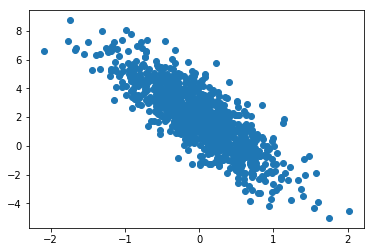

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy import stats

mean = [0, 2]
cov = [[0.3, -1], [-1, 5]]

x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x, y, 'o')
plt.show()

# Comparison of the joint p(x, y)

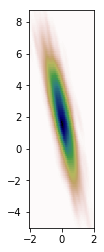

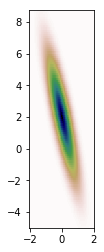

In [21]:
def p1(x,y):
    mean = [0, 2]
    cov = [[0.3, -1], [-1, 5]]
    X = np.array([x, y])
    return multivariate_normal.pdf(X, mean=mean, cov=cov)

xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
prob1 = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        prob1[i, j] = p1(X[i,j], Y[i,j])

positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

fig, ax = plt.subplots()
ax.imshow(np.rot90(prob1), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(x, y, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [22]:
positions.shape

(2, 10000)

In [23]:
values.shape

(2, 1000)

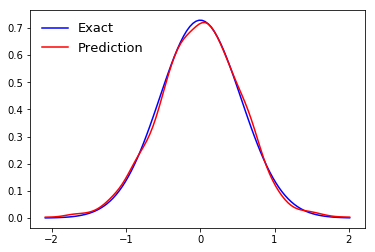

In [24]:
xmin, xmax = x.min(), x.max()
X = np.linspace(xmin, xmax, 100)[:,None]
positions = X.flatten()
values = x.flatten()
gkde = stats.gaussian_kde(values)
KDE = gkde.evaluate(positions)

def p2(x):
    mean = 0
    cov = 0.3
    return multivariate_normal.pdf(x, mean=mean, cov=cov)

prob2 = np.zeros_like(X)
for i in range(X.shape[0]):
        prob2[i, 0] = p2(X[i])

ax = plt.figure()
plt.plot(X, prob2, 'b-', label = 'Exact')
plt.plot(X, KDE, 'r-', label = 'Prediction')
plt.legend(loc='upper left', frameon=False, prop={'size': 13})
plt.show()

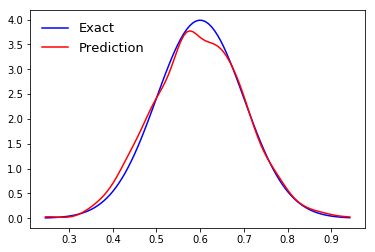

In [25]:
x = np.random.normal(0.6, 0.1, 1000)
xmin, xmax = x.min(), x.max()
X = np.linspace(xmin, xmax, 100)[:,None]
positions = X.flatten()
values = x.flatten()
gkde = stats.gaussian_kde(values)
KDE = gkde.evaluate(positions)

def p2(x):
    mean = 0.6
    cov = 0.01
    return multivariate_normal.pdf(x, mean=mean, cov=cov)

prob2 = np.zeros_like(X)
for i in range(X.shape[0]):
        prob2[i, 0] = p2(X[i])

ax = plt.figure()
plt.plot(X, prob2, 'b-', label = 'Exact')
plt.plot(X, KDE, 'r-', label = 'Prediction')
plt.legend(loc='upper left', frameon=False, prop={'size': 13})
plt.show()

# Problem 4

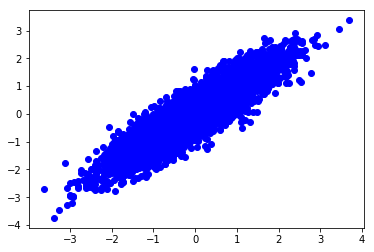

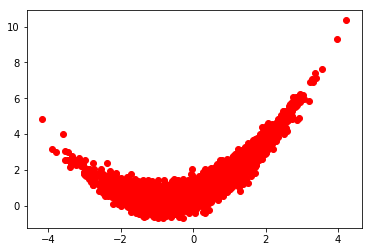

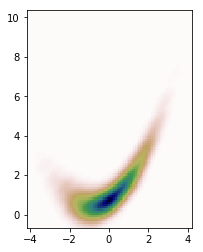

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

mean = [0, 0]
cov = [[1., 0.9], [0.9, 1]]

x1, x2 = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x1, x2, 'bo')
plt.show()

alpha = 1.15
beta = 0.5
y1 = alpha * x1
y2 = x2 / alpha + beta * (x1**2 + alpha**2)
plt.plot(y1, y2, 'ro')
plt.show()

xmin = y1.min()
xmax = y1.max()
ymin = y2.min()
ymax = y2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([y1, y2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
#ax.plot(y1, y2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [28]:
ymean1 = y1.mean()
ymean2 = y2.mean()
print(ymean1)
print(ymean2)

-0.009024736325983761
1.1553558762460463
